In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.datasets import fetch_20newsgroups_vectorized

%matplotlib inline 
sns.set(style="ticks")

In [2]:
data_train = fetch_20newsgroups_vectorized(subset='train', remove=('headers', 'footers'))
data_test = fetch_20newsgroups_vectorized(subset='test', remove=('headers', 'footers'))

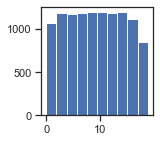

In [3]:
# Оценим дисбаланс классов
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data_train.target)
plt.show()

In [4]:
def test(model):
    print(model)
    model.fit(data_train.data, data_train.target)
    print("accuracy:", accuracy_score(data_test.target, model.predict(data_test.data)))

In [5]:
test(LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=100000))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy: 0.6558682952734998


In [6]:
test(LinearSVC())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
accuracy: 0.7684545937334042


In [7]:
test(MultinomialNB())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy: 0.6289166224110462


In [8]:
test(ComplementNB())

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
accuracy: 0.7943441317047265


In [9]:
test(BernoulliNB())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
accuracy: 0.544875199150292


Метод Complement Naive Bayes, лучше всего решил поставленную задачу многоклассовой классификации, но LinearSVC также показал отличный результат и практический не уступил методу Complement Naive Bayes.